In [4]:
import pandas as pd
pd.options.display.max_columns = 999
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import pandas_profiling
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection import train_test_split 


/Users/shashankkumar/anaconda2/lib/python2.7/site-packages/pandas_profiling/plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/shashankkumar/anaconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/Users/shashankkumar/anaconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/Users/shashankkumar/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/shashankkumar/anaconda2/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/shashankkumar/anaconda2/lib/p

# Importing Data 

In [5]:
data = pd.read_csv("/Users/shashankkumar/Studies/Self/DataScience/Projects/Dataset/HousingPricePrediction/AmesHousing.tsv", delimiter="\t")

In [6]:
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [7]:
def transform_features(data):
    return data

def select_features(data):
    return data[["Gr Liv Area", "SalePrice"]]

def train_and_test(data):
    train=data[:1460]
    test=data[1460:]
    num_train=train.select_dtypes(include=['integer','float'])
    num_test=test.select_dtypes(include=['integer','float'])
    features=num_train.columns.drop('SalePrice')
    lr=LinearRegression()
    lr.fit(train[features], train['SalePrice'])
    prediction=lr.predict(test[features])
    mse = mean_squared_error(test["SalePrice"], prediction)
    rmse = np.sqrt(mse)
    return rmse



In [8]:
data_missing=data.isnull().sum()

# Data Exploration

In [9]:
pandas_profiling.ProfileReport(data)

Number of variables,82
Number of observations,2930
Total Missing (%),0.0%
Total size in memory,1.8 MiB
Average record size in memory,656.0 B
Numeric,39
Categorical,43
Boolean,0
Date,0
Text (Unique),0
Rejected,0


# Data Cleaning

In [10]:
data.columns

Index([u'Order', u'PID', u'MS SubClass', u'MS Zoning', u'Lot Frontage',
       u'Lot Area', u'Street', u'Alley', u'Lot Shape', u'Land Contour',
       u'Utilities', u'Lot Config', u'Land Slope', u'Neighborhood',
       u'Condition 1', u'Condition 2', u'Bldg Type', u'House Style',
       u'Overall Qual', u'Overall Cond', u'Year Built', u'Year Remod/Add',
       u'Roof Style', u'Roof Matl', u'Exterior 1st', u'Exterior 2nd',
       u'Mas Vnr Type', u'Mas Vnr Area', u'Exter Qual', u'Exter Cond',
       u'Foundation', u'Bsmt Qual', u'Bsmt Cond', u'Bsmt Exposure',
       u'BsmtFin Type 1', u'BsmtFin SF 1', u'BsmtFin Type 2', u'BsmtFin SF 2',
       u'Bsmt Unf SF', u'Total Bsmt SF', u'Heating', u'Heating QC',
       u'Central Air', u'Electrical', u'1st Flr SF', u'2nd Flr SF',
       u'Low Qual Fin SF', u'Gr Liv Area', u'Bsmt Full Bath',
       u'Bsmt Half Bath', u'Full Bath', u'Half Bath', u'Bedroom AbvGr',
       u'Kitchen AbvGr', u'Kitchen Qual', u'TotRms AbvGrd', u'Functional',
       u'Fi

In [11]:
data.shape

(2930, 82)

In [12]:
#Dropping columns having more than 5% missing values
drop_missing_cols=data_missing[data_missing>len(data)/20].sort_values()
data=data.drop(drop_missing_cols.index,axis=1)

In [13]:
data.shape

(2930, 71)

In [14]:
data.columns

Index([u'Order', u'PID', u'MS SubClass', u'MS Zoning', u'Lot Area', u'Street',
       u'Lot Shape', u'Land Contour', u'Utilities', u'Lot Config',
       u'Land Slope', u'Neighborhood', u'Condition 1', u'Condition 2',
       u'Bldg Type', u'House Style', u'Overall Qual', u'Overall Cond',
       u'Year Built', u'Year Remod/Add', u'Roof Style', u'Roof Matl',
       u'Exterior 1st', u'Exterior 2nd', u'Mas Vnr Type', u'Mas Vnr Area',
       u'Exter Qual', u'Exter Cond', u'Foundation', u'Bsmt Qual', u'Bsmt Cond',
       u'Bsmt Exposure', u'BsmtFin Type 1', u'BsmtFin SF 1', u'BsmtFin Type 2',
       u'BsmtFin SF 2', u'Bsmt Unf SF', u'Total Bsmt SF', u'Heating',
       u'Heating QC', u'Central Air', u'Electrical', u'1st Flr SF',
       u'2nd Flr SF', u'Low Qual Fin SF', u'Gr Liv Area', u'Bsmt Full Bath',
       u'Bsmt Half Bath', u'Full Bath', u'Half Bath', u'Bedroom AbvGr',
       u'Kitchen AbvGr', u'Kitchen Qual', u'TotRms AbvGrd', u'Functional',
       u'Fireplaces', u'Garage Cars', u'Garag

In [15]:
data.isnull().sum()

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Area            0
Street              0
Lot Shape           0
Land Contour        0
Utilities           0
Lot Config          0
Land Slope          0
Neighborhood        0
Condition 1         0
Condition 2         0
Bldg Type           0
House Style         0
Overall Qual        0
Overall Cond        0
Year Built          0
Year Remod/Add      0
Roof Style          0
Roof Matl           0
Exterior 1st        0
Exterior 2nd        0
Mas Vnr Type       23
Mas Vnr Area       23
Exter Qual          0
Exter Cond          0
Foundation          0
Bsmt Qual          80
                   ..
Electrical          1
1st Flr SF          0
2nd Flr SF          0
Low Qual Fin SF     0
Gr Liv Area         0
Bsmt Full Bath      2
Bsmt Half Bath      2
Full Bath           0
Half Bath           0
Bedroom AbvGr       0
Kitchen AbvGr       0
Kitchen Qual        0
TotRms AbvGrd       0
Functional          0
Fireplaces

In [16]:
## Column name -> number of missing values
text_mv_counts = data.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)

## Dropping any columns with missing values
drop_missing_cols_2 = text_mv_counts[text_mv_counts > 0]

data = data.drop(drop_missing_cols_2.index, axis=1)

In [17]:
data.columns

Index([u'Order', u'PID', u'MS SubClass', u'MS Zoning', u'Lot Area', u'Street',
       u'Lot Shape', u'Land Contour', u'Utilities', u'Lot Config',
       u'Land Slope', u'Neighborhood', u'Condition 1', u'Condition 2',
       u'Bldg Type', u'House Style', u'Overall Qual', u'Overall Cond',
       u'Year Built', u'Year Remod/Add', u'Roof Style', u'Roof Matl',
       u'Exterior 1st', u'Exterior 2nd', u'Mas Vnr Area', u'Exter Qual',
       u'Exter Cond', u'Foundation', u'BsmtFin SF 1', u'BsmtFin SF 2',
       u'Bsmt Unf SF', u'Total Bsmt SF', u'Heating', u'Heating QC',
       u'Central Air', u'1st Flr SF', u'2nd Flr SF', u'Low Qual Fin SF',
       u'Gr Liv Area', u'Bsmt Full Bath', u'Bsmt Half Bath', u'Full Bath',
       u'Half Bath', u'Bedroom AbvGr', u'Kitchen AbvGr', u'Kitchen Qual',
       u'TotRms AbvGrd', u'Functional', u'Fireplaces', u'Garage Cars',
       u'Garage Area', u'Paved Drive', u'Wood Deck SF', u'Open Porch SF',
       u'Enclosed Porch', u'3Ssn Porch', u'Screen Porch', u'Poo

## Imputing missing data

For imputing missing values, we can follow following replace NaN with following:
- the mean, median or mode of the distribution
- random samples from the actual distribution of the feature
- Use another algorithm like Decision Tree to predict the missing value based on rest of the attributes

For the time being, we will impute missing values with mode.

In [18]:
## Identify columns which has missing values <5%
num_missing = data.select_dtypes(include=['int', 'float']).isnull().sum()
fixable_numeric_cols = num_missing[(num_missing < len(data)/20) & (num_missing > 0)].sort_values()
fixable_numeric_cols

BsmtFin SF 1       1
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
Garage Cars        1
Garage Area        1
Bsmt Full Bath     2
Bsmt Half Bath     2
Mas Vnr Area      23
dtype: int64

In [19]:
data.isnull().any().sum()

9

In [20]:

## Compute the most common value for each column in `fixable_nmeric_missing_cols`.
replacement_values_dict = data[fixable_numeric_cols.index].mode().to_dict(orient='records')[0]
replacement_values_dict

## Use `pd.DataFrame.fillna()` to replace missing values.
data = data.fillna(replacement_values_dict)

In [21]:
data.isnull().any().sum()

0

In [22]:
data.shape

(2930, 64)

In [23]:
data.columns

Index([u'Order', u'PID', u'MS SubClass', u'MS Zoning', u'Lot Area', u'Street',
       u'Lot Shape', u'Land Contour', u'Utilities', u'Lot Config',
       u'Land Slope', u'Neighborhood', u'Condition 1', u'Condition 2',
       u'Bldg Type', u'House Style', u'Overall Qual', u'Overall Cond',
       u'Year Built', u'Year Remod/Add', u'Roof Style', u'Roof Matl',
       u'Exterior 1st', u'Exterior 2nd', u'Mas Vnr Area', u'Exter Qual',
       u'Exter Cond', u'Foundation', u'BsmtFin SF 1', u'BsmtFin SF 2',
       u'Bsmt Unf SF', u'Total Bsmt SF', u'Heating', u'Heating QC',
       u'Central Air', u'1st Flr SF', u'2nd Flr SF', u'Low Qual Fin SF',
       u'Gr Liv Area', u'Bsmt Full Bath', u'Bsmt Half Bath', u'Full Bath',
       u'Half Bath', u'Bedroom AbvGr', u'Kitchen AbvGr', u'Kitchen Qual',
       u'TotRms AbvGrd', u'Functional', u'Fireplaces', u'Garage Cars',
       u'Garage Area', u'Paved Drive', u'Wood Deck SF', u'Open Porch SF',
       u'Enclosed Porch', u'3Ssn Porch', u'Screen Porch', u'Poo

## Feature Engineering

The columns 'Year Remod/Add' and 'Year Built' do not seem to add value to the prediction individually. The two main issues with these features are:

- Year values aren't representative of how old a house is.
- The Year Remod/Add column doesn't actually provide useful information for a linear regression model

The challenge with year values like 1960 and 1961 is that they don't do a good capture how old a house is. For example, a house that was built in 1960 but sold in 1980 was sold in half the time one built in 1960 and sold in 2000. Instead of the years certain events happened, the difference between those are of more interest. So, we will create a new column 'years_since_remod'.

In [24]:
data.columns

Index([u'Order', u'PID', u'MS SubClass', u'MS Zoning', u'Lot Area', u'Street',
       u'Lot Shape', u'Land Contour', u'Utilities', u'Lot Config',
       u'Land Slope', u'Neighborhood', u'Condition 1', u'Condition 2',
       u'Bldg Type', u'House Style', u'Overall Qual', u'Overall Cond',
       u'Year Built', u'Year Remod/Add', u'Roof Style', u'Roof Matl',
       u'Exterior 1st', u'Exterior 2nd', u'Mas Vnr Area', u'Exter Qual',
       u'Exter Cond', u'Foundation', u'BsmtFin SF 1', u'BsmtFin SF 2',
       u'Bsmt Unf SF', u'Total Bsmt SF', u'Heating', u'Heating QC',
       u'Central Air', u'1st Flr SF', u'2nd Flr SF', u'Low Qual Fin SF',
       u'Gr Liv Area', u'Bsmt Full Bath', u'Bsmt Half Bath', u'Full Bath',
       u'Half Bath', u'Bedroom AbvGr', u'Kitchen AbvGr', u'Kitchen Qual',
       u'TotRms AbvGrd', u'Functional', u'Fireplaces', u'Garage Cars',
       u'Garage Area', u'Paved Drive', u'Wood Deck SF', u'Open Porch SF',
       u'Enclosed Porch', u'3Ssn Porch', u'Screen Porch', u'Poo

In [25]:
years_sold = data['Yr Sold'] - data['Year Built']
years_sold[years_sold < 0] 


2180   -1
dtype: int64

In [26]:
years_since_remod = data['Yr Sold'] - data['Year Remod/Add']
years_since_remod[years_since_remod < 0]

1702   -1
2180   -2
2181   -1
dtype: int64

In [27]:
## Create new columns
data['Years Before Sale'] = years_sold
data['Years Since Remod'] = years_since_remod

## Drop rows with negative values for both of these new features
data = data.drop([1702, 2180, 2181], axis=0)

## Drop  year columns
data = data.drop(["Year Built", "Year Remod/Add"], axis = 1)

In [28]:
data.columns

Index([u'Order', u'PID', u'MS SubClass', u'MS Zoning', u'Lot Area', u'Street',
       u'Lot Shape', u'Land Contour', u'Utilities', u'Lot Config',
       u'Land Slope', u'Neighborhood', u'Condition 1', u'Condition 2',
       u'Bldg Type', u'House Style', u'Overall Qual', u'Overall Cond',
       u'Roof Style', u'Roof Matl', u'Exterior 1st', u'Exterior 2nd',
       u'Mas Vnr Area', u'Exter Qual', u'Exter Cond', u'Foundation',
       u'BsmtFin SF 1', u'BsmtFin SF 2', u'Bsmt Unf SF', u'Total Bsmt SF',
       u'Heating', u'Heating QC', u'Central Air', u'1st Flr SF', u'2nd Flr SF',
       u'Low Qual Fin SF', u'Gr Liv Area', u'Bsmt Full Bath',
       u'Bsmt Half Bath', u'Full Bath', u'Half Bath', u'Bedroom AbvGr',
       u'Kitchen AbvGr', u'Kitchen Qual', u'TotRms AbvGrd', u'Functional',
       u'Fireplaces', u'Garage Cars', u'Garage Area', u'Paved Drive',
       u'Wood Deck SF', u'Open Porch SF', u'Enclosed Porch', u'3Ssn Porch',
       u'Screen Porch', u'Pool Area', u'Misc Val', u'Mo Sold', 

Columns: "Mo Sold", "Sale Condition", "Sale Type", "Yr Sold" gives info about the the target we are going to pedicting, in other words leaking the info about final sale

In [29]:
features_to_drop=['Order','PID',"Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"]
data=data.drop(features_to_drop, axis=1)

In [30]:
data.shape

(2927, 58)

In [31]:
def transform_features(data):
    drop_missing_cols=data_missing[data_missing>len(data)/20].sort_values()
    data=data.drop(drop_missing_cols.index,axis=1)
    
    ## Column name -> number of missing values
    text_mv_counts = data.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)

    ## Dropping any columns with missing values
    drop_missing_cols_2 = text_mv_counts[text_mv_counts > 0]
    data = data.drop(drop_missing_cols_2.index, axis=1)
    
    ## Identify columns which has missing values <5%
    num_missing = data.select_dtypes(include=['int', 'float']).isnull().sum()
    fixable_numeric_cols = num_missing[(num_missing < len(data)/20) & (num_missing > 0)].sort_values()
    fixable_numeric_cols
    
    
    ## Compute the most common value for each column in `fixable_nmeric_missing_cols`.
    replacement_values_dict = data[fixable_numeric_cols.index].mode().to_dict(orient='records')[0]
    replacement_values_dict

    ## replace missing values with most common values
    data = data.fillna(replacement_values_dict)
    years_sold = data['Yr Sold'] - data['Year Built']
    years_sold[years_sold < 0] 
    years_since_remod = data['Yr Sold'] - data['Year Remod/Add']
    years_since_remod[years_since_remod < 0]
    ## Create new columns
    data['Years Before Sale'] = years_sold
    data['Years Since Remod'] = years_since_remod

    ## Drop rows with negative values for both of these new features
    data = data.drop([1702, 2180, 2181], axis=0)

    ## Drop  year columns
    data = data.drop(["Year Built", "Year Remod/Add"], axis = 1)
    features_to_drop=['Order','PID',"Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"]
    data=data.drop(features_to_drop, axis=1)
    
    return data

def select_features(data):
    return data[["Gr Liv Area", "SalePrice"]]

def train_and_test(data):
    train=data[:1460]
    test=data[1460:]
    num_train=train.select_dtypes(include=['integer','float'])
    num_test=test.select_dtypes(include=['integer','float'])
    features=num_train.columns.drop('SalePrice')
    lr=LinearRegression()
    lr.fit(train[features], train['SalePrice'])
    prediction=lr.predict(test[features])
    mse = mean_squared_error(test["SalePrice"], prediction)
    rmse = np.sqrt(mse)
    return rmse

data = pd.read_csv("/Users/shashankkumar/Studies/Self/DataScience/Projects/Dataset/HousingPricePrediction/AmesHousing.tsv", delimiter="\t")
transform_df=transform_features(data)
features_df=select_features(transform_df)
rmse=train_and_test(features_df)
rmse


55275.36731241307

# Feature Selection

In [32]:
num_feature_df=transform_df.select_dtypes(include=['float','int'])

In [33]:
num_feature_df.shape

(2927, 33)

In [34]:
cat_feature_df = transform_df.select_dtypes(include=['object'])
cat_feature_df.shape

(2927, 25)

In [35]:
corr_score=num_feature_df.corr()['SalePrice'].abs().sort_values()
corr_score

BsmtFin SF 2         0.006127
Misc Val             0.019273
3Ssn Porch           0.032268
Bsmt Half Bath       0.035875
Low Qual Fin SF      0.037629
Pool Area            0.068438
MS SubClass          0.085128
Overall Cond         0.101540
Screen Porch         0.112280
Kitchen AbvGr        0.119760
Enclosed Porch       0.128685
Bedroom AbvGr        0.143916
Bsmt Unf SF          0.182751
Lot Area             0.267520
2nd Flr SF           0.269601
Bsmt Full Bath       0.276258
Half Bath            0.284871
Open Porch SF        0.316262
Wood Deck SF         0.328183
BsmtFin SF 1         0.439284
Fireplaces           0.474831
TotRms AbvGrd        0.498574
Mas Vnr Area         0.506983
Years Since Remod    0.534985
Full Bath            0.546118
Years Before Sale    0.558979
1st Flr SF           0.635185
Garage Area          0.641425
Total Bsmt SF        0.644012
Garage Cars          0.648361
Gr Liv Area          0.717596
Overall Qual         0.801206
SalePrice            1.000000
Name: Sale

In [36]:
num_feature_df=num_feature_df.drop(corr_score[corr_score<0.4].index, axis=1)

In [37]:
num_feature_df.shape

(2927, 14)

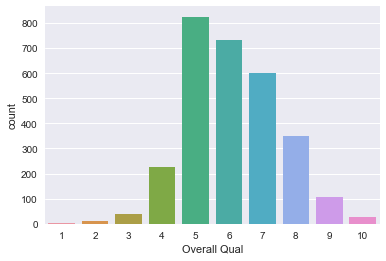

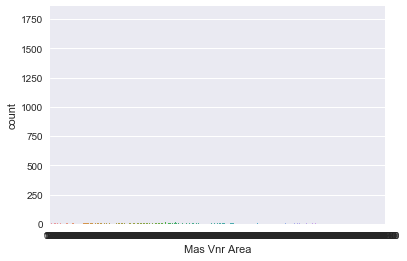

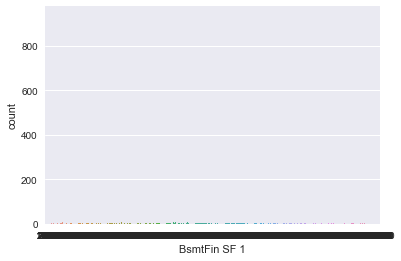

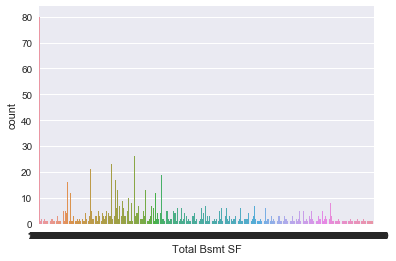

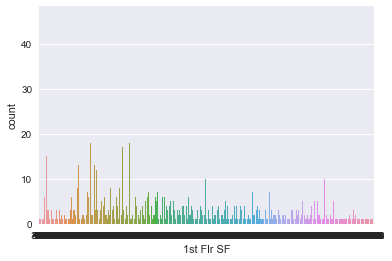

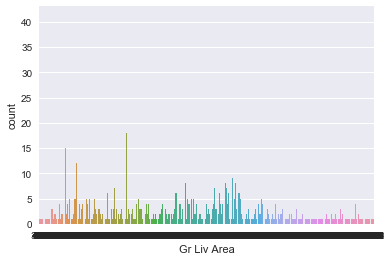

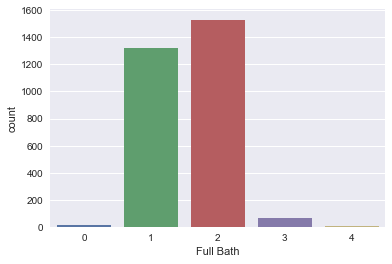

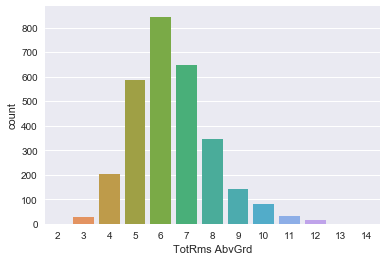

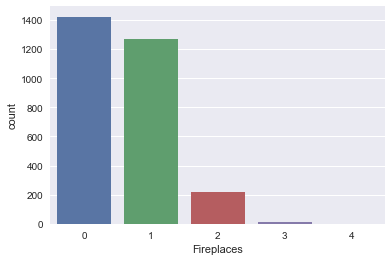

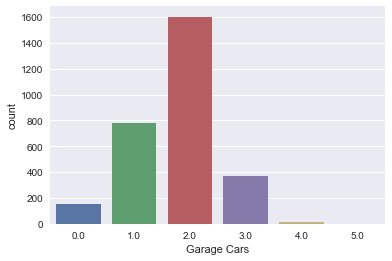

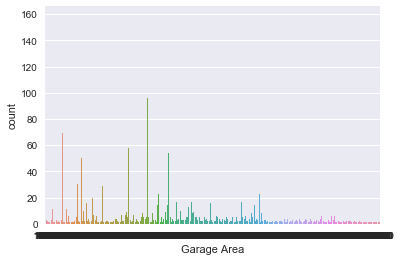

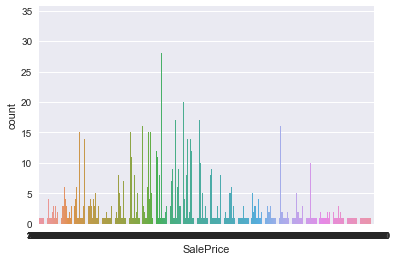

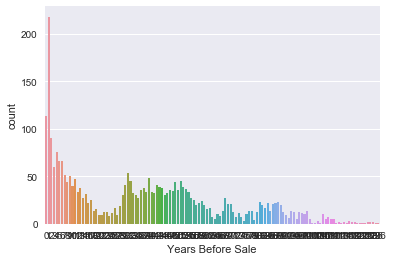

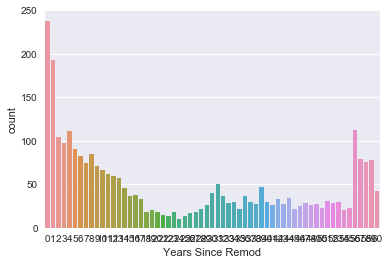

In [38]:
%matplotlib inline
import seaborn as sns
def plot_features(df):
    
    sns.set(color_codes=True)
    for i, col in enumerate(df.columns):
        plt.figure(i)
        sns.countplot(x=col, data=df)
plot_features(num_feature_df)

In [39]:
# Following variables are ordinal and not numeric. So removing those features from numeric features and moving them to categorical 

In [41]:


ordinal_cols=['Overall Qual',  'Full Bath', 'TotRms AbvGrd', 'Fireplaces','Garage Cars']
print(type(ordinal_cols))
print(type(cat_feature_df))
cat_feature_df=pd.concat([cat_feature_df, num_feature_df[ordinal_cols]],axis=1)
num_feature_df=num_feature_df.drop(ordinal_cols, axis=1)
print("numeric columns: ", num_feature_df.columns)
print("categorical columns: ", cat_feature_df.columns)

<type 'list'>
<class 'pandas.core.frame.DataFrame'>
('numeric columns: ', Index([u'Mas Vnr Area', u'BsmtFin SF 1', u'Total Bsmt SF', u'1st Flr SF',
       u'Gr Liv Area', u'Garage Area', u'SalePrice', u'Years Before Sale',
       u'Years Since Remod'],
      dtype='object'))
('categorical columns: ', Index([u'MS Zoning', u'Street', u'Lot Shape', u'Land Contour', u'Utilities',
       u'Lot Config', u'Land Slope', u'Neighborhood', u'Condition 1',
       u'Condition 2', u'Bldg Type', u'House Style', u'Roof Style',
       u'Roof Matl', u'Exterior 1st', u'Exterior 2nd', u'Exter Qual',
       u'Exter Cond', u'Foundation', u'Heating', u'Heating QC', u'Central Air',
       u'Kitchen Qual', u'Functional', u'Paved Drive', u'Overall Qual',
       u'Full Bath', u'TotRms AbvGrd', u'Fireplaces', u'Garage Cars'],
      dtype='object'))


#var = 'Overall Qual'
#data1 = pd.concat([num_feature_df['SalePrice'], cat_feature_df[var]], axis=1)
def create_boxplot(df,column_name1, column_name2):
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=df[column_name1], y=df[column_name2], data=df)
    fig.axis(ymin=0, ymax=800000);
create_boxplot(num_feature_df, )


## Target Analysis

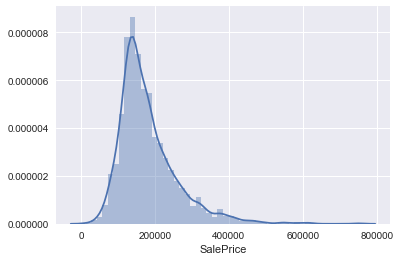

In [42]:
x = num_feature_df['SalePrice']
sns.distplot(x);

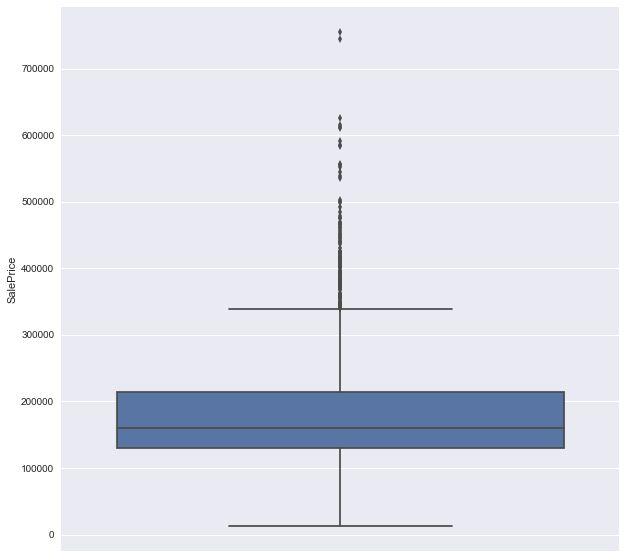

In [43]:
fig, ax = plt.subplots(figsize=(10,10))
sns.set_style("whitegrid")
sns.boxplot(x="SalePrice", data=num_feature_df,orient = 'v',ax = ax)


It is quite clear that the dataset is not normally distrbuted and some houses having extremely high prices. Lt's remove those and see what happens. 

In [44]:
num_feature_df['SalePrice'][num_feature_df['SalePrice']>600000].count()

6

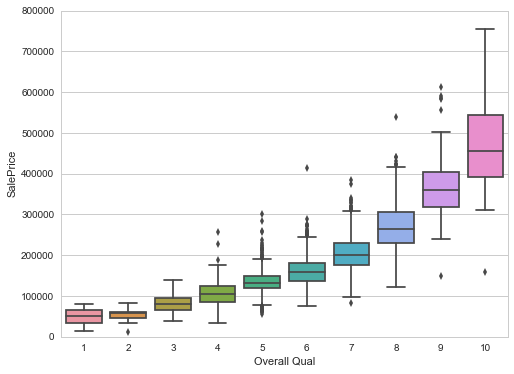

In [45]:
#box plot overallqual/saleprice
var = 'Overall Qual'
data1 = pd.concat([num_feature_df['SalePrice'], cat_feature_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data1)
fig.axis(ymin=0, ymax=800000);

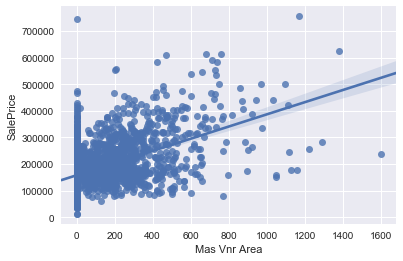

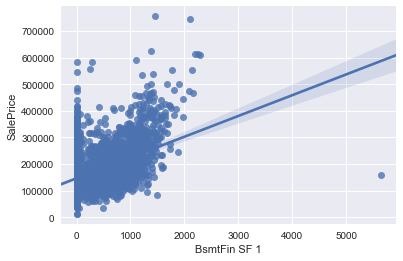

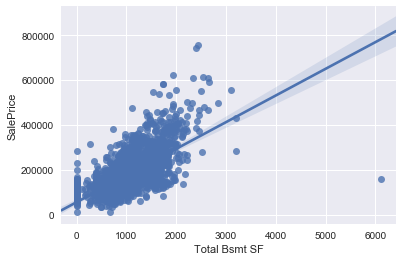

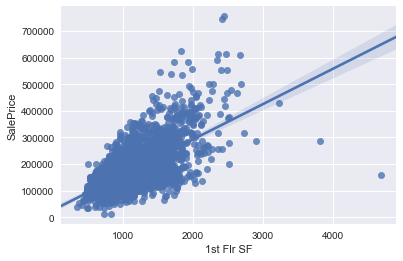

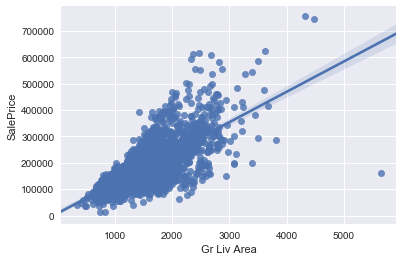

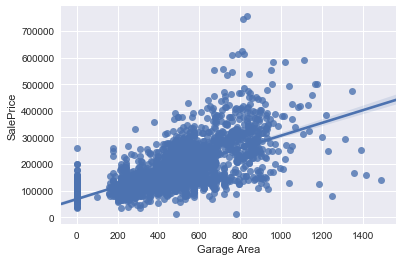

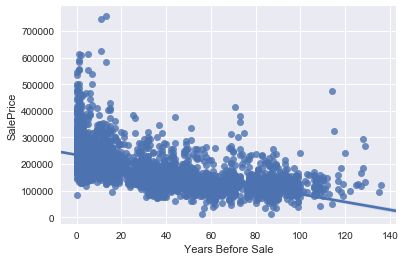

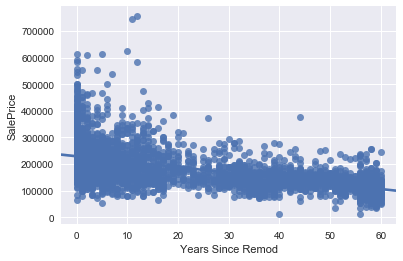

In [46]:

def plot_target_n_features(df): 
    sns.set(color_codes=True)
    for i, col in enumerate(df.columns):
        plt.figure(i)
        sns.regplot(x=col, y=num_feature_df['SalePrice'], data=df)
plot_target_n_features(num_feature_df.iloc[:,num_feature_df.columns!='SalePrice'])

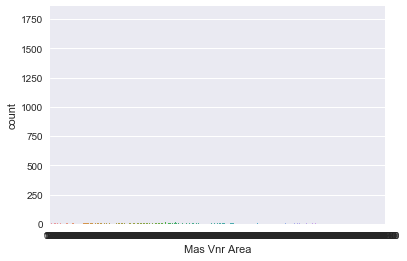

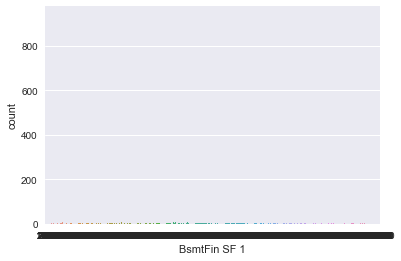

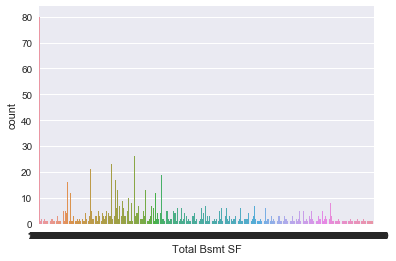

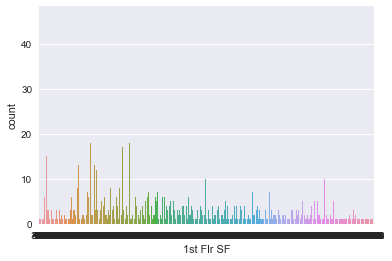

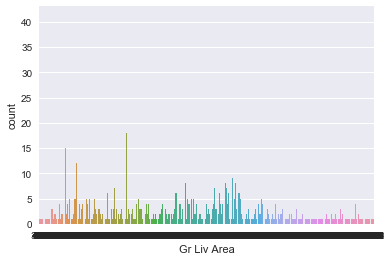

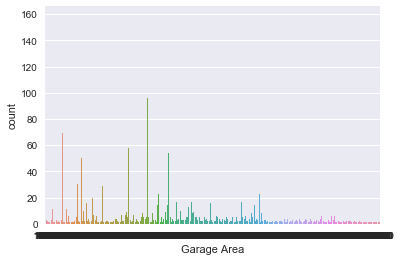

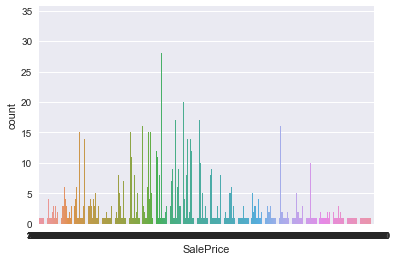

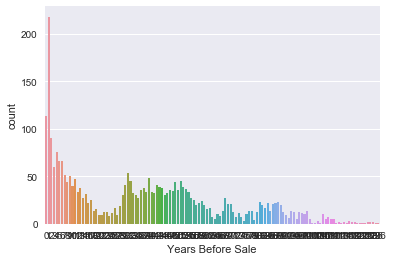

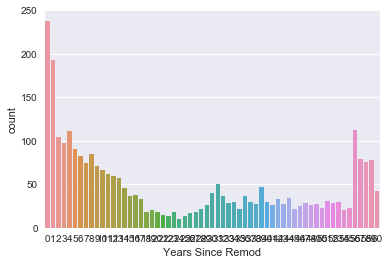

In [47]:
plot_features(num_feature_df)

In [51]:
pandas_profiling.ProfileReport(num_feature_df)

Number of variables,10
Number of observations,2927
Total Missing (%),0.0%
Total size in memory,228.7 KiB
Average record size in memory,80.0 B
Numeric,10
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


## Feature Transformation

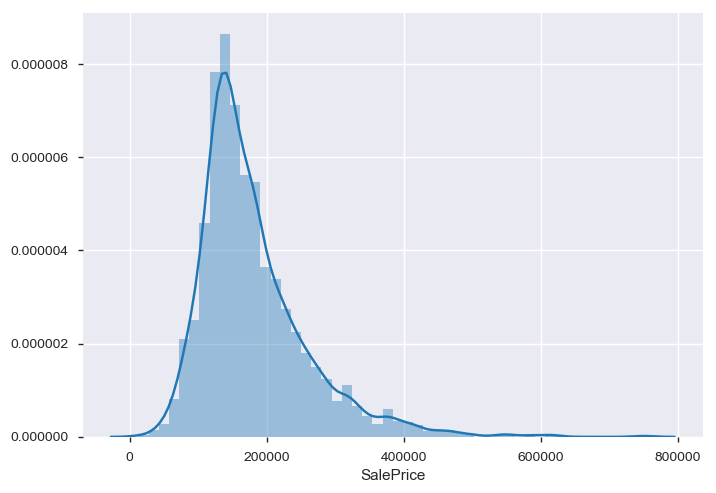

In [52]:
x = num_feature_df['SalePrice']
sns.distplot(x);

Positive skew! Let's try to normalize this using log transformation!

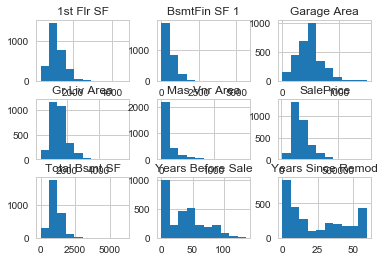

In [100]:
num_feature_df.hist()
plt.show()




In [55]:
num_feature_df.columns

Index([u'Mas Vnr Area', u'BsmtFin SF 1', u'Total Bsmt SF', u'1st Flr SF',
       u'Gr Liv Area', u'Garage Area', u'SalePrice', u'Years Before Sale',
       u'Years Since Remod'],
      dtype='object')

In [61]:
#pandas_profiling.ProfileReport(df_log)

In [62]:
# Find out the number of levels each categorical column have
unique_count=transform_df[list(cat_feature_df)].apply(lambda x: len(x.value_counts())).sort_values()


## Dropping columns having more than 10 levels

In [63]:
#Drop columns having more than 10 levels
cols_to_drop=unique_count[unique_count>10].index
transform_df=transform_df.drop(cols_to_drop, axis=1)

In [64]:
transform_df.columns


Index([u'MS SubClass', u'MS Zoning', u'Lot Area', u'Street', u'Lot Shape',
       u'Land Contour', u'Utilities', u'Lot Config', u'Land Slope',
       u'Condition 1', u'Condition 2', u'Bldg Type', u'House Style',
       u'Overall Qual', u'Overall Cond', u'Roof Style', u'Roof Matl',
       u'Mas Vnr Area', u'Exter Qual', u'Exter Cond', u'Foundation',
       u'BsmtFin SF 1', u'BsmtFin SF 2', u'Bsmt Unf SF', u'Total Bsmt SF',
       u'Heating', u'Heating QC', u'Central Air', u'1st Flr SF', u'2nd Flr SF',
       u'Low Qual Fin SF', u'Gr Liv Area', u'Bsmt Full Bath',
       u'Bsmt Half Bath', u'Full Bath', u'Half Bath', u'Bedroom AbvGr',
       u'Kitchen AbvGr', u'Kitchen Qual', u'Functional', u'Fireplaces',
       u'Garage Cars', u'Garage Area', u'Paved Drive', u'Wood Deck SF',
       u'Open Porch SF', u'Enclosed Porch', u'3Ssn Porch', u'Screen Porch',
       u'Pool Area', u'Misc Val', u'SalePrice', u'Years Before Sale',
       u'Years Since Remod'],
      dtype='object')

## Dummy variables for categorical features via one-hot encoding

In [65]:
# convert categorical features to dummy variables
text_cols=transform_df.select_dtypes(include=['object'])
for col in text_cols:
    transform_df[col]=transform_df[col].astype('category')
dummy_df=pd.get_dummies(transform_df.select_dtypes(include=['category']))

transform_df=pd.concat([transform_df, dummy_df],axis=1)
transform_df=transform_df.drop(text_cols, axis=1)

In [66]:
transform_df.shape


(2927, 148)

In [67]:
transform_df.columns

Index([u'MS SubClass', u'Lot Area', u'Overall Qual', u'Overall Cond',
       u'Mas Vnr Area', u'BsmtFin SF 1', u'BsmtFin SF 2', u'Bsmt Unf SF',
       u'Total Bsmt SF', u'1st Flr SF',
       ...
       u'Functional_Maj2', u'Functional_Min1', u'Functional_Min2',
       u'Functional_Mod', u'Functional_Sal', u'Functional_Sev',
       u'Functional_Typ', u'Paved Drive_N', u'Paved Drive_P',
       u'Paved Drive_Y'],
      dtype='object', length=148)

In [68]:
def transform_features(data):
    drop_missing_cols=data_missing[data_missing>len(data)/20].sort_values()
    data=data.drop(drop_missing_cols.index,axis=1)
    
    ## Column name -> number of missing values
    text_mv_counts = data.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)

    ## Dropping any columns with missing values
    drop_missing_cols_2 = text_mv_counts[text_mv_counts > 0]
    data = data.drop(drop_missing_cols_2.index, axis=1)
    
    ## Identify columns which has missing values <5%
    num_missing = data.select_dtypes(include=['int', 'float']).isnull().sum()
    fixable_numeric_cols = num_missing[(num_missing < len(data)/20) & (num_missing > 0)].sort_values()
    fixable_numeric_cols
    
    
    ## Compute the most common value for each column in `fixable_nmeric_missing_cols`.
    replacement_values_dict = data[fixable_numeric_cols.index].mode().to_dict(orient='records')[0]
    replacement_values_dict

    ## Use `pd.DataFrame.fillna()` to replace missing values.
    data = data.fillna(replacement_values_dict)
    years_sold = data['Yr Sold'] - data['Year Built']
    years_sold[years_sold < 0] 
    years_since_remod = data['Yr Sold'] - data['Year Remod/Add']
    years_since_remod[years_since_remod < 0]
    ## Create new columns
    data['Years Before Sale'] = years_sold
    data['Years Since Remod'] = years_since_remod

    ## Drop rows with negative values for both of these new features
    data = data.drop([1702, 2180, 2181], axis=0)

    ## Drop  year columns
    data = data.drop(["Year Built", "Year Remod/Add"], axis = 1)
    features_to_drop=['Order','PID',"Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"]
    data=data.drop(features_to_drop, axis=1)
    
    return data

def select_features(df):
    #Extract numeric and categorical features out of the dataset
    num_feature_df=df.select_dtypes(include=['float','int'])
    cat_feature_df = df.select_dtypes(include=['object'])
    
    #find correlation between target and the features
    corr_score=num_feature_df.corr()['SalePrice'].abs().sort_values()
    
    #remove targets with correlation less than 0.4
    num_feature_df=num_feature_df.drop(corr_score[corr_score<0.4].index, axis=1)
    
    #move ordinal variables to categorical features
    
    ordinal_cols=['Overall Qual',  'Full Bath', 'TotRms AbvGrd', 'Fireplaces','Garage Cars']
    cat_feature_df=pd.concat([cat_feature_df, num_feature_df[ordinal_cols]],axis=1)
    num_feature_df=num_feature_df.drop(ordinal_cols, axis=1)

    #Extract categorical features out of the dataset
    text_cols = df.select_dtypes(include=['object'])
    
    # Find out the number of levels each categorical column have
    unique_count=df[list(text_cols)].apply(lambda x: len(x.value_counts())).sort_values()
    
    #Drop columns having more than 10 levels
    cols_to_drop=unique_count[unique_count>10].index
    df=df.drop(cols_to_drop, axis=1)
    
    # convert categorical features to dummy variables
    text_cols=df.select_dtypes(include=['object'])
    for col in text_cols:
        df[col]=df[col].astype('category')
    dummy_df=pd.get_dummies(df.select_dtypes(include=['category']))

    df=pd.concat([df, dummy_df],axis=1)
    df=df.drop(text_cols, axis=1)
    return df

def train_and_test(df):
    features=df.columns.drop('SalePrice')
    model=LinearRegression()
    kf=KFold(10, shuffle=True, random_state=1)
    mses=cross_val_score(model, df[features], df["SalePrice"], cv=kf, scoring='neg_mean_squared_error')
    rmses=np.sqrt(np.absolute(mses))
    avg_rmse=np.mean(rmses)
    return avg_rmse
    

data = pd.read_csv("/Users/shashankkumar/Studies/Self/DataScience/Projects/Dataset/HousingPricePrediction/AmesHousing.tsv", delimiter="\t")
transform_df=transform_features(data)
features_df=select_features(transform_df)
rmse=train_and_test(features_df)
rmse


27667.580712169

def rf_hyperparamoptimizer(df):
    features=df.columns.drop('SalePrice')
    kf=KFold(10, shuffle=True, random_state=1)
    rmse_values = list()
    hyp_rmse = dict()
    hyper_params = [x for x in range(1,31)]
    for k in hyper_params:
        model=RandomForestRegressor(n_jobs=-1, random_state=0, n_estimators=20, max_depth=k, criterion='mse')
        mses=cross_val_score(model, df[features], df["SalePrice"], cv=kf, scoring='neg_mean_squared_error')
        rmses=np.sqrt(np.absolute(mses))
        avg_rmse=np.mean(rmses)
        rmse_values.append(avg_rmse)
    min_rmse=rmse_values[0]
    for index, rmse in enumerate(rmse_values): 
        if min_rmse>rmse:
            min_rmse=rmse
            key=index+1
    rmse=min_rmse
    hyp_rmse[key]=rmse
    print('Best max_depth and corresponding rmse for the Random Forest is: ',hyp_rmse)
    %matplotlib inline
    plt.plot(hyper_params,rmse_values)
    plt.show()
    return key,rmse
k,rmse=rf_hyperparamoptimizer(features_df)

model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

# Outlier Analysis

In [69]:
num_feature_df.shape

(2927, 9)

In [70]:
# Remove outliers from the target
def remove_outliers(df,column_name, cutoff):
    #[num_feature_df['SalePrice']>600000].count()
    df=df[df[column_name]<cutoff]
    return df
rem_out_df=remove_outliers(num_feature_df, 'SalePrice',600000)
rem_out_df.shape

(2921, 9)

## Linear regression after removing top outliers

In [71]:
def transform_features(data):
    drop_missing_cols=data_missing[data_missing>len(data)/20].sort_values()
    data=data.drop(drop_missing_cols.index,axis=1)
    
    ## Column name -> number of missing values
    text_mv_counts = data.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)

    ## Dropping any columns with missing values
    drop_missing_cols_2 = text_mv_counts[text_mv_counts > 0]
    data = data.drop(drop_missing_cols_2.index, axis=1)
    
    ## Identify columns which has missing values <5%
    num_missing = data.select_dtypes(include=['int', 'float']).isnull().sum()
    fixable_numeric_cols = num_missing[(num_missing < len(data)/20) & (num_missing > 0)].sort_values()
    fixable_numeric_cols
    
    
    ## Compute the most common value for each column in `fixable_nmeric_missing_cols`.
    replacement_values_dict = data[fixable_numeric_cols.index].mode().to_dict(orient='records')[0]
    replacement_values_dict

    ## Use `pd.DataFrame.fillna()` to replace missing values.
    data = data.fillna(replacement_values_dict)
    years_sold = data['Yr Sold'] - data['Year Built']
    years_sold[years_sold < 0] 
    years_since_remod = data['Yr Sold'] - data['Year Remod/Add']
    years_since_remod[years_since_remod < 0]
    ## Create new columns
    data['Years Before Sale'] = years_sold
    data['Years Since Remod'] = years_since_remod

    ## Drop rows with negative values for both of these new features
    data = data.drop([1702, 2180, 2181], axis=0)

    ## Drop  year columns
    data = data.drop(["Year Built", "Year Remod/Add"], axis = 1)
    features_to_drop=['Order','PID',"Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"]
    data=data.drop(features_to_drop, axis=1)
    
    return data

def select_features(df):
    #Extract numeric features out of the dataset
    num_feature_df=df.select_dtypes(include=['float','int'])
    
    #find correlation between target and the features
    corr_score=num_feature_df.corr()['SalePrice'].abs().sort_values()
    
    #remove targets with correlation less than 0.4
    num_feature_df=num_feature_df.drop(corr_score[corr_score<0.4].index, axis=1)
    
    #Extract categorical features out of the dataset
    text_cols = df.select_dtypes(include=['object'])
    
    # Find out the number of levels each categorical column have
    unique_count=df[list(text_cols)].apply(lambda x: len(x.value_counts())).sort_values()
    
    #Drop columns having more than 10 levels
    cols_to_drop=unique_count[unique_count>10].index
    df=df.drop(cols_to_drop, axis=1)
    
    # convert categorical features to dummy variables
    text_cols=df.select_dtypes(include=['object'])
    for col in text_cols:
        df[col]=df[col].astype('category')
    dummy_df=pd.get_dummies(df.select_dtypes(include=['category']))

    df=pd.concat([df, dummy_df],axis=1)
    df=df.drop(text_cols, axis=1)
    return df

def RF_train_and_test(df):
    features=df.columns.drop('SalePrice')
    kf=KFold(10, shuffle=True, random_state=1)
    rmse_values = list()
    hyp_rmse = dict()
    hyper_params = [x for x in range(1,31)]
    for k in hyper_params:
        model=RandomForestRegressor(n_jobs=-1, random_state=0, n_estimators=20, max_depth=k, criterion='mse')
        mses=cross_val_score(model, df[features], df["SalePrice"], cv=kf, scoring='neg_mean_squared_error')
        rmses=np.sqrt(np.absolute(mses))
        avg_rmse=np.mean(rmses)
        rmse_values.append(avg_rmse)
    min_rmse=rmse_values[0]
    for index, rmse in enumerate(rmse_values): 
        if min_rmse>rmse:
            min_rmse=rmse
            key=index+1
    rmse=min_rmse
    hyp_rmse[key]=rmse
    print('Best max_depth and corresponding rmse for the Random Forest is: ',hyp_rmse)
    %matplotlib inline
    plt.plot(hyper_params,rmse_values)
    plt.show()
    return key,rmse

def train_and_test(df):
    features=df.columns.drop('SalePrice')
    model=LinearRegression()
    kf=KFold(10, shuffle=True, random_state=1)
    mses=cross_val_score(model, df[features], df["SalePrice"], cv=kf, scoring='neg_mean_squared_error')
    rmses=np.sqrt(np.absolute(mses))
    avg_rmse=np.mean(rmses)
    return avg_rmse

data = pd.read_csv("/Users/shashankkumar/Studies/Self/DataScience/Projects/Dataset/HousingPricePrediction/AmesHousing.tsv", delimiter="\t")

transform_df=transform_features(data)
rem_out_df=remove_outliers(transform_df, 'SalePrice',600000)
features_df=select_features(rem_out_df)
rmse=train_and_test(features_df)
rmse

26867.465629575727

In [72]:
def transform_features(data):
    drop_missing_cols=data_missing[data_missing>len(data)/20].sort_values()
    data=data.drop(drop_missing_cols.index,axis=1)
    
    ## Column name -> number of missing values
    text_mv_counts = data.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)

    ## Dropping any columns with missing values
    drop_missing_cols_2 = text_mv_counts[text_mv_counts > 0]
    data = data.drop(drop_missing_cols_2.index, axis=1)
    
    ## Identify columns which has missing values <5%
    num_missing = data.select_dtypes(include=['int', 'float']).isnull().sum()
    fixable_numeric_cols = num_missing[(num_missing < len(data)/20) & (num_missing > 0)].sort_values()
    fixable_numeric_cols
    
    
    ## Compute the most common value for each column in `fixable_nmeric_missing_cols`.
    replacement_values_dict = data[fixable_numeric_cols.index].mode().to_dict(orient='records')[0]
    replacement_values_dict

    ## Use `pd.DataFrame.fillna()` to replace missing values.
    data = data.fillna(replacement_values_dict)
    years_sold = data['Yr Sold'] - data['Year Built']
    years_sold[years_sold < 0] 
    years_since_remod = data['Yr Sold'] - data['Year Remod/Add']
    years_since_remod[years_since_remod < 0]
    ## Create new columns
    data['Years Before Sale'] = years_sold
    data['Years Since Remod'] = years_since_remod

    ## Drop rows with negative values for both of these new features
    data = data.drop([1702, 2180, 2181], axis=0)

    ## Drop  year columns
    data = data.drop(["Year Built", "Year Remod/Add"], axis = 1)
    features_to_drop=['Order','PID',"Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"]
    data=data.drop(features_to_drop, axis=1)
  
    
    return data

def select_features(df):
    #Extract numeric features out of the dataset
    num_feature_df=df.select_dtypes(include=['float','int'])
    
    #find correlation between target and the features
    corr_score=num_feature_df.corr()['SalePrice'].abs().sort_values()
    
    #remove targets with correlation less than 0.4
    num_feature_df=num_feature_df.drop(corr_score[corr_score<0.4].index, axis=1)
    
    #log transform
    target=num_feature_df['SalePrice']
    num_feature_df = num_feature_df.applymap(lambda x: np.log(x+1))
    num_feature_df['SalePrice']=target
    
    #Extract categorical features out of the dataset
    text_cols = df.select_dtypes(include=['object'])
    
    # Find out the number of levels each categorical column have
    unique_count=df[list(text_cols)].apply(lambda x: len(x.value_counts())).sort_values()
    
    #Drop columns having more than 10 levels
    cols_to_drop=unique_count[unique_count>10].index
    df=df.drop(cols_to_drop, axis=1)
    
    # convert categorical features to dummy variables
    text_cols=df.select_dtypes(include=['object'])
    for col in text_cols:
        df[col]=df[col].astype('category')
    dummy_df=pd.get_dummies(df.select_dtypes(include=['category']))

    df=pd.concat([df, dummy_df],axis=1)
    df=df.drop(text_cols, axis=1)
    return df

def RF_train_and_test(df):
    features=df.columns.drop('SalePrice')
    kf=KFold(10, shuffle=True, random_state=1)
    rmse_values = list()
    hyp_rmse = dict()
    hyper_params = [x for x in range(1,31)]
    for k in hyper_params:
        model=RandomForestRegressor(n_jobs=-1, random_state=0, n_estimators=20, max_depth=k, criterion='mse')
        mses=cross_val_score(model, df[features], df["SalePrice"], cv=kf, scoring='neg_mean_squared_error')
        rmses=np.sqrt(np.absolute(mses))
        avg_rmse=np.mean(rmses)
        rmse_values.append(avg_rmse)
    min_rmse=rmse_values[0]
    for index, rmse in enumerate(rmse_values): 
        if min_rmse>rmse:
            min_rmse=rmse
            key=index+1
    rmse=min_rmse
    hyp_rmse[key]=rmse
    print('Best max_depth and corresponding rmse for the Random Forest is: ',hyp_rmse)
    %matplotlib inline
    plt.plot(hyper_params,rmse_values)
    plt.show()
    return key,rmse

def train_and_test(df):
    features=df.columns.drop('SalePrice')
    model=LinearRegression()
    kf=KFold(10, shuffle=True, random_state=1)
    mses=cross_val_score(model, df[features], df["SalePrice"], cv=kf, scoring='neg_mean_squared_error')
    rmses=np.sqrt(np.absolute(mses))
    avg_rmse=np.mean(rmses)

    return avg_rmse

data = pd.read_csv("/Users/shashankkumar/Studies/Self/DataScience/Projects/Dataset/HousingPricePrediction/AmesHousing.tsv", delimiter="\t")

transform_df=transform_features(data)
rem_out_df=remove_outliers(transform_df, 'SalePrice',600000)
features_df=select_features(rem_out_df)
rmse=train_and_test(features_df)
rmse

26867.465629576054

# Regularization

## Ridge regularization

In [114]:
def ridge_train_and_test(df):    
    #df["SalePrice"] = np.log1p(df["SalePrice"])
    X_train,X_test,y_train,y_test = train_test_split(df,df['SalePrice'], random_state = 3)

    ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60], store_cv_values=True, cv=None)
    ridge.fit(X_train,y_train)
    alpha = ridge.alpha_
    print('best alpha',alpha)
    print("Try again for more precision with alphas centered around " + str(alpha))
    ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4],store_cv_values=True, cv=None)
    ridge.fit(X_train, y_train)
    alpha = ridge.alpha_
    print("Best alpha :", alpha)
    y_train_rdg = ridge.predict(X_train)
    y_test_rdg = ridge.predict(X_test)
    rsquared=ridge.score(X_test,y_test)
    rmse=np.sqrt(sum(y_test_rdg-y_test)**2)
    
    return rmse


def transform_features(data):
    drop_missing_cols=data_missing[data_missing>len(data)/20].sort_values()
    data=data.drop(drop_missing_cols.index,axis=1)
    
    ## Column name -> number of missing values
    text_mv_counts = data.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)

    ## Dropping any columns with missing values
    drop_missing_cols_2 = text_mv_counts[text_mv_counts > 0]
    data = data.drop(drop_missing_cols_2.index, axis=1)
    
    ## Identify columns which has missing values <5%
    num_missing = data.select_dtypes(include=['int', 'float']).isnull().sum()
    fixable_numeric_cols = num_missing[(num_missing < len(data)/20) & (num_missing > 0)].sort_values()
    fixable_numeric_cols
    
    
    ## Compute the most common value for each column in `fixable_nmeric_missing_cols`.
    replacement_values_dict = data[fixable_numeric_cols.index].mode().to_dict(orient='records')[0]
    replacement_values_dict

    ## Use `pd.DataFrame.fillna()` to replace missing values.
    data = data.fillna(replacement_values_dict)
    years_sold = data['Yr Sold'] - data['Year Built']
    years_sold[years_sold < 0] 
    years_since_remod = data['Yr Sold'] - data['Year Remod/Add']
    years_since_remod[years_since_remod < 0]
    ## Create new columns
    data['Years Before Sale'] = years_sold
    data['Years Since Remod'] = years_since_remod

    ## Drop rows with negative values for both of these new features
    data = data.drop([1702, 2180, 2181], axis=0)

    ## Drop  year columns
    data = data.drop(["Year Built", "Year Remod/Add"], axis = 1)
    features_to_drop=['Order','PID',"Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"]
    data=data.drop(features_to_drop, axis=1)
    
    return data

def select_features(df):
    #Extract numeric features out of the dataset
    num_feature_df=df.select_dtypes(include=['float','int'])
    
    #find correlation between target and the features
    corr_score=num_feature_df.corr()['SalePrice'].abs().sort_values()
    
    #remove targets with correlation less than 0.4
    num_feature_df=num_feature_df.drop(corr_score[corr_score<0.4].index, axis=1)
    
    #Extract categorical features out of the dataset
    text_cols = df.select_dtypes(include=['object'])
    
    # Find out the number of levels each categorical column have
    unique_count=df[list(text_cols)].apply(lambda x: len(x.value_counts())).sort_values()
    
    #Drop columns having more than 10 levels
    cols_to_drop=unique_count[unique_count>10].index
    df=df.drop(cols_to_drop, axis=1)
    
    # convert categorical features to dummy variables
    text_cols=df.select_dtypes(include=['object'])
    for col in text_cols:
        df[col]=df[col].astype('category')
    dummy_df=pd.get_dummies(df.select_dtypes(include=['category']))

    df=pd.concat([df, dummy_df],axis=1)
    df=df.drop(text_cols, axis=1)
    return df

def train_and_test(df):
    features=df.columns.drop('SalePrice')
    model=LinearRegression()
    kf=KFold(10, shuffle=True, random_state=1)
    mses=cross_val_score(model, df[features], df["SalePrice"], cv=kf, scoring='neg_mean_squared_error')
    rmses=np.sqrt(np.absolute(mses))
    avg_rmse=np.mean(rmses)
    return avg_rmse

data = pd.read_csv("/Users/shashankkumar/Studies/Self/DataScience/Projects/Dataset/HousingPricePrediction/AmesHousing.tsv", delimiter="\t")

transform_df=transform_features(data)
rem_out_df=remove_outliers(transform_df, 'SalePrice',600000)
features_df=select_features(rem_out_df)
ridge_score=ridge_train_and_test(features_df)
ridge_score

('best alpha', 0.03)
Try again for more precision with alphas centered around 0.03
('Best alpha :', 0.0225)


356487.26438623463

# Model 2- Random Forest Regressor

('Best max_depth and corresponding rmse for the Random Forest is: ', {15: 25703.05155382712})


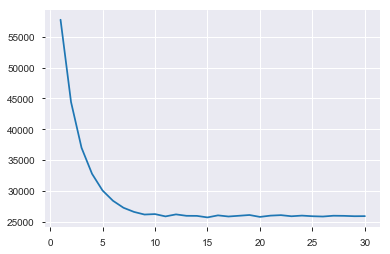

25703.05155382712

In [74]:

def transform_features(data):
    drop_missing_cols=data_missing[data_missing>len(data)/20].sort_values()
    data=data.drop(drop_missing_cols.index,axis=1)
    
    ## Column name -> number of missing values
    text_mv_counts = data.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)

    ## Dropping any columns with missing values
    drop_missing_cols_2 = text_mv_counts[text_mv_counts > 0]
    data = data.drop(drop_missing_cols_2.index, axis=1)
    
    ## Identify columns which has missing values <5%
    num_missing = data.select_dtypes(include=['int', 'float']).isnull().sum()
    fixable_numeric_cols = num_missing[(num_missing < len(data)/20) & (num_missing > 0)].sort_values()
    fixable_numeric_cols
    
    
    ## Compute the most common value for each column in `fixable_nmeric_missing_cols`.
    replacement_values_dict = data[fixable_numeric_cols.index].mode().to_dict(orient='records')[0]
    replacement_values_dict

    ## Use `pd.DataFrame.fillna()` to replace missing values.
    data = data.fillna(replacement_values_dict)
    years_sold = data['Yr Sold'] - data['Year Built']
    years_sold[years_sold < 0] 
    years_since_remod = data['Yr Sold'] - data['Year Remod/Add']
    years_since_remod[years_since_remod < 0]
    ## Create new columns
    data['Years Before Sale'] = years_sold
    data['Years Since Remod'] = years_since_remod

    ## Drop rows with negative values for both of these new features
    data = data.drop([1702, 2180, 2181], axis=0)

    ## Drop  year columns
    data = data.drop(["Year Built", "Year Remod/Add"], axis = 1)
    features_to_drop=['Order','PID',"Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"]
    data=data.drop(features_to_drop, axis=1)
    
    return data

def select_features(df):
    #Extract numeric features out of the dataset
    num_feature_df=df.select_dtypes(include=['float','int'])
    
    #find correlation between target and the features
    corr_score=num_feature_df.corr()['SalePrice'].abs().sort_values()
    
    #remove targets with correlation less than 0.4
    num_feature_df=num_feature_df.drop(corr_score[corr_score<0.4].index, axis=1)
    
    #Extract categorical features out of the dataset
    text_cols = df.select_dtypes(include=['object'])
    
    # Find out the number of levels each categorical column have
    unique_count=df[list(text_cols)].apply(lambda x: len(x.value_counts())).sort_values()
    
    #Drop columns having more than 10 levels
    cols_to_drop=unique_count[unique_count>10].index
    df=df.drop(cols_to_drop, axis=1)
    
    # convert categorical features to dummy variables
    text_cols=df.select_dtypes(include=['object'])
    for col in text_cols:
        df[col]=df[col].astype('category')
    dummy_df=pd.get_dummies(df.select_dtypes(include=['category']))

    df=pd.concat([df, dummy_df],axis=1)
    df=df.drop(text_cols, axis=1)
    return df

def train_and_test(df):
    features=df.columns.drop('SalePrice')
    kf=KFold(10, shuffle=True, random_state=1)
    rmse_values = list()
    hyp_rmse = dict()
    hyper_params = [x for x in range(1,31)]
    for k in hyper_params:
        model=RandomForestRegressor(n_jobs=-1, random_state=0, n_estimators=20, max_depth=k, criterion='mse')
        mses=cross_val_score(model, df[features], df["SalePrice"], cv=kf, scoring='neg_mean_squared_error')
        rmses=np.sqrt(np.absolute(mses))
        avg_rmse=np.mean(rmses)
        rmse_values.append(avg_rmse)
    min_rmse=rmse_values[0]
    for index, rmse in enumerate(rmse_values): 
        if min_rmse>rmse:
            min_rmse=rmse
            key=index+1
    rmse=min_rmse
    hyp_rmse[key]=rmse
    print('Best max_depth and corresponding rmse for the Random Forest is: ',hyp_rmse)
    %matplotlib inline
    plt.plot(hyper_params,rmse_values)
    plt.show()
    return key,rmse


data = pd.read_csv("/Users/shashankkumar/Studies/Self/DataScience/Projects/Dataset/HousingPricePrediction/AmesHousing.tsv", delimiter="\t")
transform_df=transform_features(data)
features_df=select_features(transform_df)
k, rmse=train_and_test(features_df)
rmse


# Ridge Regression

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)
model_ridge = Ridge()

alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() for alpha in alphas]

rmse_cv_ridge = pd.Series(cv_ridge, index = alphas)
rmse_cv_ridge.plot(title = "Validation")
plt.xlabel("alpha")
plt.ylabel("rmse")

